# Marks Sheet Grading Example for AI, ML and DL

In [1]:
import numpy as np
import pandas as pd

In [3]:
df1 = pd.DataFrame(np.random.randint(20,32, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df2 = pd.DataFrame(np.random.randint(33,39, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df3 = pd.DataFrame(np.random.randint(40,49, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df4 = pd.DataFrame(np.random.randint(50,59, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df5 = pd.DataFrame(np.random.randint(60,69, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df6 = pd.DataFrame(np.random.randint(70,79, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df7 = pd.DataFrame(np.random.randint(80,100, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])

del df1,df2,df3,df4,df5,df6,df7

df.head()

,s1,s2,s3,s4,s5
0,24,26,24,27,31
1,22,22,26,27,22
2,31,26,26,29,29
3,30,28,24,22,26
4,28,28,27,20,22


In [4]:
df.shape

(35000, 5)

In [5]:
df['obtained'] = df.s1 + df.s2 + df.s3 + df.s4 + df.s5
df.head()

,s1,s2,s3,s4,s5,obtained
0,24,26,24,27,31,132
1,22,22,26,27,22,119
2,31,26,26,29,29,141
3,30,28,24,22,26,130
4,28,28,27,20,22,125


In [7]:
df['obtained'] = df.loc[:,'s1':'s5'].sum(axis=1)
df.head()

,s1,s2,s3,s4,s5,obtained
0,24,26,24,27,31,132
1,22,22,26,27,22,119
2,31,26,26,29,29,141
3,30,28,24,22,26,130
4,28,28,27,20,22,125


In [15]:
#                                total 
df['percentage'] = df.obtained / 500 * 100
df.head(7)

,s1,s2,s3,s4,s5,obtained,percentage
0,24,26,24,27,31,132,26.4
1,22,22,26,27,22,119,23.8
2,31,26,26,29,29,141,28.2
3,30,28,24,22,26,130,26.0
4,28,28,27,20,22,125,25.0
5,28,26,28,24,21,127,25.4
6,27,31,28,22,25,133,26.6


# apply Symbolic AI, Classicial programming, tranditional programming, Rules Based programmin
- Rules always define by programmer

- Rules + Input = Output

In [16]:
def grade(x): # defined rules
    if x >= 80:
        return "A+"
    elif x >= 70:
        return "A"
    elif x >= 60:
        return "B"
    elif x >= 50:
        return "C"
    elif x >= 40:
        return "D"
    elif x >= 33:
        return "E"
    else:
        return "F"
    
    
df['Grade'] = df.percentage.apply(grade)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade
0,24,26,24,27,31,132,26.4,F
1,22,22,26,27,22,119,23.8,F
2,31,26,26,29,29,141,28.2,F
3,30,28,24,22,26,130,26.0,F
4,28,28,27,20,22,125,25.0,F


In [20]:
df.Grade.value_counts()

B     5000
F     5000
D     5000
C     5000
A     5000
E     5000
A+    5000
Name: Grade, dtype: int64

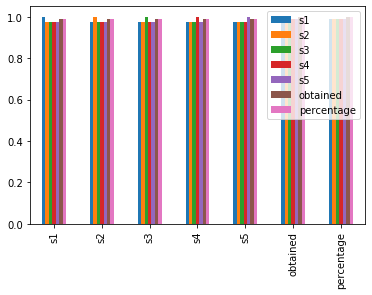

In [21]:
df.corr().plot(kind='bar')

In [22]:
dic = {
    'F':7,
    "E":6,
    "D":5,
    "C":4,
    "B":3,
    "A":2,
    "A+":1
}
df['Grade1'] = df.Grade.map(dic)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade,Grade1
0,24,26,24,27,31,132,26.4,F,7
1,22,22,26,27,22,119,23.8,F,7
2,31,26,26,29,29,141,28.2,F,7
3,30,28,24,22,26,130,26.0,F,7
4,28,28,27,20,22,125,25.0,F,7


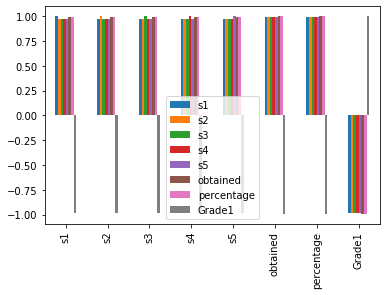

In [23]:
df.corr().plot(kind='bar')

# Find Grades(Rules) with Deep Learning
- input + Output = Rules

In [29]:
df1 = df[['s1', 's2', 's3', 's4', 's5', 'Grade']]
df1.head(2)
df1 = df1.sample(frac=1)
df1.head(10)

,s1,s2,s3,s4,s5,Grade
3221,77,71,76,74,76,A
515,37,37,33,34,34,E
4739,96,96,94,95,90,A+
3418,37,34,38,35,36,E
654,54,52,50,56,53,C
2844,50,54,54,58,55,C
2293,53,53,51,50,54,C
1437,84,84,97,99,89,A+
2462,21,31,23,24,26,F
3146,51,56,52,58,58,C


In [31]:
X = df1.loc[:, 's1':'s5']
X.head()

,s1,s2,s3,s4,s5
3221,77,71,76,74,76
515,37,37,33,34,34
4739,96,96,94,95,90
3418,37,34,38,35,36
654,54,52,50,56,53


In [32]:
Y = df1[['Grade']]
Y.head()

,Grade
3221,A
515,E
4739,A+
3418,E
654,C


# Vectorization to Y
- one-hot-encoding

In [34]:
Y = df1['Grade']
Y = pd.get_dummies(Y)
Y.head()

,A,A+,B,C,D,E,F
3221,1,0,0,0,0,0,0
515,0,0,0,0,0,1,0
4739,0,1,0,0,0,0,0
3418,0,0,0,0,0,1,0
654,0,0,0,1,0,0,0


In [35]:
Y.drop_duplicates()

,A,A+,B,C,D,E,F
3221,1,0,0,0,0,0,0
515,0,0,0,0,0,1,0
4739,0,1,0,0,0,0,0
654,0,0,0,1,0,0,0
2462,0,0,0,0,0,0,1
2049,0,0,1,0,0,0,0
3162,0,0,0,0,1,0,0


##### import some fundamentals lib

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

Create your model network structure
- first-layer (input_shape = X.no_of_columns)
- last-layers (output=Y.unique_labels(unique classes))
    - activation = according to your problems (Table 4.1)
- Dense(output, )

In [37]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 119       
Total params: 839
Trainable params: 839
Non-trainable params: 0
_________________________________________________________________


In [39]:
# select loss function based on your problems

model.compile(optimizer=SGD(lr=0.002),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [41]:
model.fit(X, Y, epochs=100)

Epoch 1/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.5106 - acc: 0.3750
Epoch 2/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.5032 - acc: 0.3802
Epoch 3/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4905 - acc: 0.3860
Epoch 4/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4779 - acc: 0.3890
Epoch 5/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4710 - acc: 0.3935
Epoch 6/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4551 - acc: 0.4010
Epoch 7/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4509 - acc: 0.3997
Epoch 8/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4431 - acc: 0.4013
Epoch 9/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4371 - acc: 0.4024
Epoch 10/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.4295 - acc: 0.4059
Epoch 11/100
1094/1

1094/1094 [==============================] - 2s 2ms/step - loss: 0.5391 - acc: 0.8308
Epoch 84/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5311 - acc: 0.8525
Epoch 85/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5449 - acc: 0.8361
Epoch 86/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.6157 - acc: 0.8265
Epoch 87/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5776 - acc: 0.8423
Epoch 88/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5875 - acc: 0.8262
Epoch 89/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5578 - acc: 0.8377
Epoch 90/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5067 - acc: 0.8687
Epoch 91/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.4516 - acc: 0.8819
Epoch 92/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.5182 - acc: 0.8565
Epoch 93/100
1094/1094 

In [42]:
df1 = pd.DataFrame(np.random.randint(20,100, size=(20,5)),
                  columns = ['s1','s2','s3','s4','s5'])

df1.head()

,s1,s2,s3,s4,s5
0,49,61,89,33,94
1,24,46,82,21,39
2,61,53,23,28,64
3,54,83,24,86,27
4,44,83,90,62,98


In [46]:
np.argmax(model.predict([[90,98,95,97,95]]))

1

In [47]:
Y.columns.take(np.argmax(model.predict([[90,98,95,97,95]]), axis=1))

Index(['A+'], dtype='object')

In [50]:
df1['predict']=Y.columns.take(np.argmax(model.predict(df1.loc[:,'s1':'s5']), axis=1))
df1.tail(20)

,s1,s2,s3,s4,s5,predict
0,49,61,89,33,94,F
1,24,46,82,21,39,F
2,61,53,23,28,64,F
3,54,83,24,86,27,F
4,44,83,90,62,98,F
5,63,34,33,57,92,A+
6,60,90,83,95,64,A+
7,23,75,48,76,49,F
8,25,87,63,76,24,F
9,85,21,92,42,87,F


# Find Grades(Rules) With Machine Learning

In [51]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [53]:
#split dataset in features and target variable
feature_cols = ['percentage']
X = df[feature_cols] # Features
y = df.Grade # Target variable


In [54]:
X.head(1)

,percentage
0,26.4


In [55]:
y.head(1)

0    F
Name: Grade, dtype: object

In [56]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [58]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [59]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 1.0


In [61]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(651.0, 498.3, 'X[0] <= 79.6\ngini = 0.857\nsamples = 24500\nvalue = [3520, 3543, 3516, 3469, 3505, 3494, 3453]\nclass = y[1]'),
 Text(558.0, 407.70000000000005, 'X[0] <= 69.0\ngini = 0.833\nsamples = 20957\nvalue = [3520, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[0]'),
 Text(465.0, 317.1, 'X[0] <= 59.1\ngini = 0.8\nsamples = 17437\nvalue = [0, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[2]'),
 Text(372.0, 226.5, 'X[0] <= 39.1\ngini = 0.75\nsamples = 13921\nvalue = [0, 0, 0, 3469, 3505, 3494, 3453]\nclass = y[4]'),
 Text(186.0, 135.89999999999998, 'X[0] <= 31.6\ngini = 0.5\nsamples = 6947\nvalue = [0, 0, 0, 0, 0, 3494, 3453]\nclass = y[5]'),
 Text(93.0, 45.299999999999955, 'gini = 0.0\nsamples = 3453\nvalue = [0, 0, 0, 0, 0, 0, 3453]\nclass = y[6]'),
 Text(279.0, 45.299999999999955, 'gini = 0.0\nsamples = 3494\nvalue = [0, 0, 0, 0, 0, 3494, 0]\nclass = y[5]'),
 Text(558.0, 135.89999999999998, 'X[0] <= 49.1\ngini = 0.5\nsamples = 6974\nvalue = [0, 0, 0, 3469, 3505, 0, 0]\nclass =

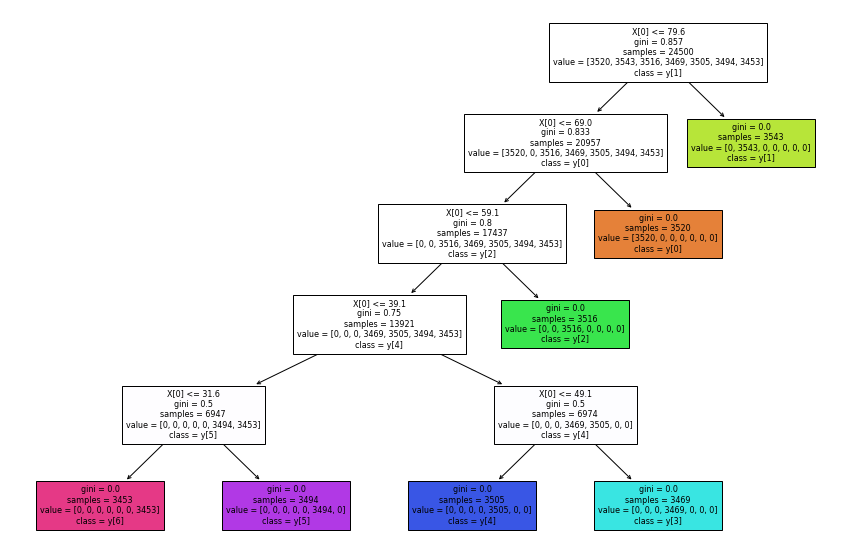

In [62]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=tree, class_names=True,
              fontsize=8)